# Cart Pole game
# On-Policy Learning

### Environment: OpenAi Gym 

https://openai.com/

### Random action for the CartPole game

In [1]:
import gym
import time
env = gym.make('CartPole-v0')
for i_episode in range(3):
    observation = env.reset()
    for t in range(200):
        env.render()
        time.sleep(0.02)
        print(observation)
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
        print(reward)
#        if done:
#            print("Episode finished after {} timesteps".format(t+1))
#            break

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
[ 0.02784968  0.01849886 -0.02380967  0.03483518]
1.0
[ 0.02821966 -0.1762737  -0.02311296  0.31991184]
1.0
[ 0.02469418  0.01916966 -0.01671473  0.02003049]
1.0
[ 0.02507758  0.21452728 -0.01631412 -0.27787891]
1.0
[ 0.02936812  0.01964182 -0.02187169  0.00961424]
1.0
[ 0.02976096  0.2150705  -0.02167941 -0.28988843]
1.0
[ 0.03406237  0.41049477 -0.02747718 -0.5893292 ]
1.0
[ 0.04227227  0.60599048 -0.03926376 -0.89053935]
1.0
[ 0.05439208  0.80162253 -0.05707455 -1.19530183]
1.0
[ 0.07042453  0.9974351  -0.08098059 -1.50531323]
1.0
[ 0.09037323  1.19344069 -0.11108685 -1.82214039]
1.0
[ 0.11424204  1.38960722 -0.14752966 -2.14716889]
1.0
[ 0.14203419  1.19621508 -0.19047304 -1.9034484 ]
1.0
[ 0.16595849  1.00359517 -0.228542   -1.67540497]
WARN: You are calling 'step()' even though this environment has already returned done = True. You should always call 'reset()' once you receive 'done

[ 4.74290314  2.34760133 -2.65732116 -5.56377874]
0.0
[ 4.78985517  2.13586797 -2.76859673 -5.98173506]
0.0
[ 4.83257252  1.92520527 -2.88823144 -6.38313695]
0.0
[ 4.87107663  1.71759385 -3.01589417 -6.75830604]
0.0
[ 4.90542851  1.90512988 -3.1510603  -6.5160795 ]
0.0
[ 4.9435311   1.71053716 -3.28138189 -6.80517206]
0.0
[ 4.97774185  1.9136446  -3.41748533 -6.46251843]
0.0
[ 5.01601474  2.12249087 -3.54673569 -6.08100877]
0.0
[ 5.05846456  2.33461625 -3.66835587 -5.67269912]
0.0
[ 5.10515688  2.1646534  -3.78180985 -5.74527788]
0.0
[ 5.14844995  2.38025356 -3.89671541 -5.31029521]
0.0
[ 5.19605502  2.2167643  -4.00292131 -5.28737028]
0.0
[ 5.24039031  2.05618739 -4.10866872 -5.22121683]
0.0
[ 5.28151406  2.26933694 -4.21309306 -4.79767703]
0.0
[ 5.32690079  2.10900063 -4.3090466  -4.65472394]
0.0
[ 5.36908081  2.31593278 -4.40214108 -4.26248652]
0.0
[ 5.41539946  2.51865282 -4.48739081 -3.88968866]
0.0
[ 5.46577252  2.35258494 -4.56518458 -3.65867483]
0.0
[ 5.51282422  2.18449649 -4.

[-0.39247367  0.14338734  7.94718752  6.71228412]
0.0
[-0.38960592  0.36735726  8.0814332   7.03627566]
0.0
[-0.38225877  0.59675569  8.22215871  7.40029591]
0.0
[-0.37032366  0.83158478  8.37016463  7.80137137]
0.0
[-0.35369196  1.0712397   8.52619206  8.23449352]
0.0
[-0.33226717  1.31422569  8.69088193  8.69150026]
0.0
[-0.30598266  1.55784557  8.86471193  9.15976942]
0.0
[-0.27482575  1.41560061  9.04790732  9.13518544]
0.0
[-0.24651373  1.25692077  9.23061103  9.02206539]
0.0
[-0.22137532  1.46950135  9.41105234  9.39167135]
0.0
[-0.19198529  1.6659985   9.59888576  9.69042451]
0.0
[-0.15866532  1.84241603  9.79269425  9.90012058]
0.0
[-0.121817    1.99687045  9.99069667 10.01055425]
0.0
[-0.08187959  2.13027329 10.19090775 10.02182122]
0.0
[-0.03927413  2.246212   10.39134418  9.94329392]
0.0
[5.65011478e-03 2.35010188e+00 1.05902101e+01 9.78988386e+00]
0.0
[ 0.05265215  2.44804779 10.78600773  9.57764794]
0.0
[ 0.10161311  2.54586773 10.97756069  9.32060541]
0.0
[ 0.15253046  2.

[ 0.50011445 -0.29499566 -4.55450912 -6.98779051]
0.0
[ 0.49421453 -0.43113022 -4.69426493 -6.72955262]
0.0
[ 0.48559193 -0.57154627 -4.82885598 -6.43941806]
0.0
[ 0.474161   -0.71760022 -4.95764434 -6.12195174]
0.0
[ 0.459809   -0.87012754 -5.08008338 -5.78119821]
0.0
[ 0.44240645 -1.02947933 -5.19570734 -5.42092752]
0.0
[ 0.42181686 -0.82651659 -5.30412589 -5.30208423]
0.0
[ 0.40528653 -0.99692558 -5.41016758 -4.91549005]
0.0
[ 0.38534802 -0.7992925  -5.50847738 -4.88068021]
0.0
[ 0.36936217 -0.6021417  -5.60609098 -4.88635849]
0.0
[ 0.35731934 -0.78443635 -5.70381815 -4.48903866]
0.0
[ 0.34163061 -0.58939894 -5.79359893 -4.57288896]
0.0
[ 0.32984263 -0.39380009 -5.88505671 -4.69356429]
0.0
[ 0.32196663 -0.19762846 -5.97892799 -4.85082527]
0.0
[ 0.31801406 -0.38871721 -6.0759445  -4.4892794 ]
0.0
[ 0.31023971 -0.58208223 -6.16573009 -4.1449446 ]
0.0
[ 0.29859807 -0.38686126 -6.24862898 -4.40130597]
0.0
[ 0.29086084 -0.19159861 -6.3366551  -4.68386755]
0.0
[ 2.87028872e-01  3.10413061

# Policy Gradient method for playing Cart Pole game

### Loadding library

In [2]:
import gym
#from RL_brain import PolicyGradient
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

#DISPLAY_REWARD_THRESHOLD = 400  # renders environment if total episode reward is greater then this threshold


/home/yanhua/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Create environment

In [3]:
RENDER = False  # rendering wastes time

env = gym.make('CartPole-v0')
env.seed(1)     # reproducible, general Policy gradient has high variance
env = env.unwrapped

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


### CartPole environment information

In [4]:
print(env.action_space)
print(env.observation_space)
print(env.observation_space.high)
print(env.observation_space.low)


Discrete(2)
Box(4,)
[4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]
[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]


# Built neural network graph.

### 2 dense layer neural network. output the probability of action.

In [5]:
# setting the network parameter
output_graph=False
learning_rate=0.01
reward_decay=0.95
    
n_actions = env.action_space.n
n_features = env.observation_space.shape[0]
lr = learning_rate
gamma = reward_decay

ep_obs, ep_as, ep_rs = [], [], []

with tf.name_scope('inputs'):
        tf_obs = tf.placeholder(tf.float32, [None, n_features], name="observations")
        tf_acts = tf.placeholder(tf.int32, [None, ], name="actions_num")
        tf_vt = tf.placeholder(tf.float32, [None, ], name="actions_value")
    # fc1
layer = tf.layers.dense(
        inputs=tf_obs,
        units=10,
        activation=tf.nn.tanh,  # tanh activation
        kernel_initializer=tf.random_normal_initializer(mean=0, stddev=0.3),
        bias_initializer=tf.constant_initializer(0.1),
        name='fc1'
    )
    # fc2
all_act = tf.layers.dense(
        inputs=layer,
        units=n_actions,
        activation=None,
        kernel_initializer=tf.random_normal_initializer(mean=0, stddev=0.3),
        bias_initializer=tf.constant_initializer(0.1),
        name='fc2'
    )


### output the approximate action for maximum reward.

In [6]:
all_act_prob = tf.nn.softmax(all_act, name='act_prob')  # use softmax to convert to probability

## The policy gradient method.

### $log[\pi(action|state)]*R(state,action)$

## $W = W + LearningRate*log[\pi(action|state)]*R(state,action)$
https://www.sharelatex.com/learn/Mathematical_expressions

http://web.ift.uib.no/Teori/KURS/WRK/TeX/symALL.html

In [7]:
with tf.name_scope('loss'):
    # to maximize total reward (log_p * R) is to minimize -(log_p * R), and the tf only have minimize(loss)
    neg_log_prob = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=all_act, labels=tf_acts)   # this is negative log of chosen action
        # or in this way:
    # neg_log_prob = tf.reduce_sum(-tf.log(all_act_prob)*tf.one_hot(tf_acts, n_actions), axis=1)
loss = tf.reduce_mean(neg_log_prob * tf_vt)  # reward guided loss

# Run the tensorflow graph.

In [8]:
with tf.name_scope('train'):
    train_op = tf.train.AdamOptimizer(lr).minimize(loss)
    
sess = tf.Session()

if output_graph:
    # $ tensorboard --logdir=logs
    # http://0.0.0.0:6006/
    # tf.train.SummaryWriter soon be deprecated, use following
    tf.summary.FileWriter("logs/", sess.graph)

sess.run(tf.global_variables_initializer())

In [9]:
env.observation_space.shape

(4,)

### choosing the action form the probability of action.

In [10]:
def choose_action(observation):
    prob_weights = sess.run(all_act_prob, feed_dict={tf_obs: observation[np.newaxis, :]})
    action = np.random.choice(range(prob_weights.shape[1]), p=prob_weights.ravel())  # select action w.r.t the actions prob
    return action

###  store the data for training the neural network.

In [11]:
def store_transition(s, a, r):
    ep_obs.append(s)
    ep_as.append(a)
    ep_rs.append(r)

### Play self for training the model.

In [12]:
game_episodes=500 #game episodes setting for traning.

# Training the nueral network.
training per one time game.

episode: 0   reward: 14


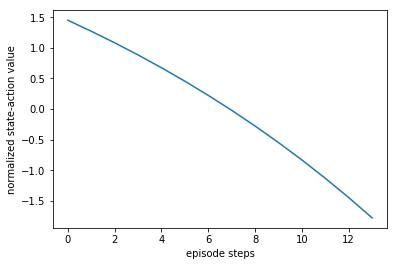

episode: 1   reward: 13
episode: 2   reward: 14
episode: 3   reward: 14
episode: 4   reward: 14
episode: 5   reward: 14
episode: 6   reward: 14
episode: 7   reward: 14
episode: 8   reward: 14
episode: 9   reward: 14
episode: 10   reward: 14
episode: 11   reward: 14
episode: 12   reward: 14
episode: 13   reward: 14
episode: 14   reward: 15
episode: 15   reward: 15
episode: 16   reward: 15
episode: 17   reward: 15
episode: 18   reward: 15
episode: 19   reward: 15
episode: 20   reward: 15
episode: 21   reward: 15
episode: 22   reward: 15
episode: 23   reward: 15
episode: 24   reward: 15
episode: 25   reward: 15
episode: 26   reward: 15
episode: 27   reward: 15
episode: 28   reward: 15
episode: 29   reward: 15
episode: 30   reward: 16
episode: 31   reward: 15
episode: 32   reward: 16
episode: 33   reward: 16
episode: 34   reward: 16
episode: 35   reward: 16
episode: 36   reward: 16
episode: 37   reward: 17
episode: 38   reward: 17
episode: 39   reward: 18
episode: 40   reward: 18
episode: 

In [14]:
for i_episode in range(game_episodes):

    observation = env.reset()

    while True:
        if RENDER: env.render()

        action = choose_action(observation)

        observation_, reward, done, info = env.step(action)

        store_transition(observation, action, reward)

        if done:
            ep_rs_sum = sum(ep_rs)

            if 'running_reward' not in globals():
                running_reward = ep_rs_sum
            else:
                running_reward = running_reward * 0.99 + ep_rs_sum * 0.01
            #if running_reward > DISPLAY_REWARD_THRESHOLD: RENDER = True     # rendering
            print("episode:", i_episode, "  reward:", int(running_reward))

            # discount and normalize episode reward
            # discount episode rewards
            discounted_ep_rs = np.zeros_like(ep_rs)
            running_add = 0
            for t in reversed(range(0, len(ep_rs))):
                running_add = running_add * gamma + ep_rs[t]
                discounted_ep_rs[t] = running_add

            # normalize episode rewards
            discounted_ep_rs -= np.mean(discounted_ep_rs)
            discounted_ep_rs /= np.std(discounted_ep_rs)
     
            discounted_ep_rs_norm = discounted_ep_rs

            # train on episode
            sess.run(train_op, feed_dict={
                tf_obs: np.vstack(ep_obs),  # shape=[None, n_obs]
                tf_acts: np.array(ep_as),  # shape=[None, ]
                tf_vt: discounted_ep_rs_norm,  # shape=[None, ]
            })

            ep_obs, ep_as, ep_rs = [], [], []    # empty episode data
     
            vt = discounted_ep_rs_norm

            if i_episode == 0:
                plt.plot(vt)    # plot the episode vt
                plt.xlabel('episode steps')
                plt.ylabel('normalized state-action value')
                plt.show()
            break

        observation = observation_
    if int(running_reward)>2000:
        #3000
        break

wait a moment... ...

# What is Reinforcement Learning

The processing is Random action start -> Learning from self training and got error (reward) in environment -> Become Master

Reinforcement Learning is the method of Learning from self-training error (reward) .

RL used case: DeepMind AlphaGo (Model based RL) , Human behavior Robot . Self-driving car

RL not use loss. RL use the reward.  For training the neural network.

Some methods in Reinforcement Learning

    1,valuable base: Q-learning, Sarsa
    2,action base: Policy Gradients **
    3,model base: Model based RL (know the environment)


# What is Policy Gradient

action base

output is probability of choosing action.

use the reward to change the probability high or low for the action.

and traing the neural network.

# Testing the traned neural network for checking performance.

In [15]:
for i_episode in range(1):

    observation = env.reset()

    while True:
        if RENDER: env.render()

        action = choose_action(observation)

        observation_, reward, done, info = env.step(action)

        if done:
            break

        observation = observation_

In [16]:
RENDER = True

In [17]:
game_episodes=1 #game episodes setting for traning.

episode: 0   reward: 2315


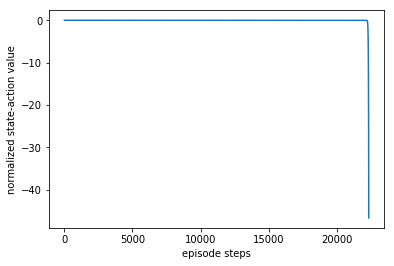

In [18]:
for i_episode in range(game_episodes):

    observation = env.reset()

    while True:
        if RENDER: env.render()

        action = choose_action(observation)

        observation_, reward, done, info = env.step(action)

        store_transition(observation, action, reward)

        if done:
            ep_rs_sum = sum(ep_rs)

            if 'running_reward' not in globals():
                running_reward = ep_rs_sum
            else:
                running_reward = running_reward * 0.99 + ep_rs_sum * 0.01
            #if running_reward > DISPLAY_REWARD_THRESHOLD: RENDER = True     # rendering
            print("episode:", i_episode, "  reward:", int(running_reward))

            # discount and normalize episode reward
            # discount episode rewards
            discounted_ep_rs = np.zeros_like(ep_rs)
            running_add = 0
            for t in reversed(range(0, len(ep_rs))):
                running_add = running_add * gamma + ep_rs[t]
                discounted_ep_rs[t] = running_add

            # normalize episode rewards
            discounted_ep_rs -= np.mean(discounted_ep_rs)
            discounted_ep_rs /= np.std(discounted_ep_rs)
     
            discounted_ep_rs_norm = discounted_ep_rs

            ep_obs, ep_as, ep_rs = [], [], []    # empty episode data
     
            vt = discounted_ep_rs_norm

            if i_episode == 0:
                plt.plot(vt)    # plot the episode vt
                plt.xlabel('episode steps')
                plt.ylabel('normalized state-action value')
                plt.show()
            break

        observation = observation_

# Store the neural network model.

In [14]:
saver = tf.train.Saver()

In [30]:
#saver_path = saver.save(sess,"/home/yanhua/Documents/jupyter/yan/demo/save_model/PG_CartPole/model.ckpt")
#print("Model saved in path: %s" % saver_path)

Model saved in path: /home/yanhua/Documents/jupyter/yan/demo/save_model/PG_CartPole/model.ckpt


In [15]:
saver.restore(sess,"/home/yanhua/Documents/jupyter/yan/demo/save_model/PG_CartPole/model.ckpt")
print("Model restored.")

INFO:tensorflow:Restoring parameters from /home/yanhua/Documents/jupyter/yan/demo/save_model/PG_CartPole/model.ckpt
Model restored.


In [16]:
RENDER = True

In [17]:
for i_episode in range(1):

    observation = env.reset()

    while True:
        if RENDER: env.render()

        action = choose_action(observation)

        observation_, reward, done, info = env.step(action)

        if done:
            break

        observation = observation_

# initializer the neural network for random action

In [24]:
sess.run(tf.global_variables_initializer())

In [25]:
for i_episode in range(3):

    observation = env.reset()

    for t in range(200):
        env.render()
        time.sleep(0.02)
        action = choose_action(observation)
        observation_, reward, done, info = env.step(action)
        observation = observation_

WARN: You are calling 'step()' even though this environment has already returned done = True. You should always call 'reset()' once you receive 'done = True' -- any further steps are undefined behavior.
WARN: You are calling 'step()' even though this environment has already returned done = True. You should always call 'reset()' once you receive 'done = True' -- any further steps are undefined behavior.
WARN: You are calling 'step()' even though this environment has already returned done = True. You should always call 'reset()' once you receive 'done = True' -- any further steps are undefined behavior.


jupyter is just for understanding scenario.

for real developing :
env, method (A3C,PG,DDPG,Q-learning,... etc) ---> at least we can design two oriented object for the Reinforcement Learning.
main programing---> Reinforcement Learning task scenario.
